In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


Matplotlib is building the font cache; this may take a moment.


In [6]:
uni=pd.read_csv(r"H:\project\uni.csv")
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
uni.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
uni.tail(25)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
475,476,300,101,3,3.5,2.5,7.88,0,0.59
476,477,304,104,3,2.5,2.0,8.12,0,0.62
477,478,309,105,4,3.5,2.0,8.18,0,0.65
478,479,318,103,3,4.0,4.5,8.49,1,0.71
479,480,325,110,4,4.5,4.0,8.96,1,0.79
480,481,321,102,3,3.5,4.0,9.01,1,0.80
481,482,323,107,4,3.0,2.5,8.48,1,0.78
482,483,328,113,4,4.0,2.5,8.77,1,0.83
483,484,304,103,5,5.0,3.0,7.92,0,0.71
484,485,317,106,3,3.5,3.0,7.89,1,0.73


In [12]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [14]:
uni.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

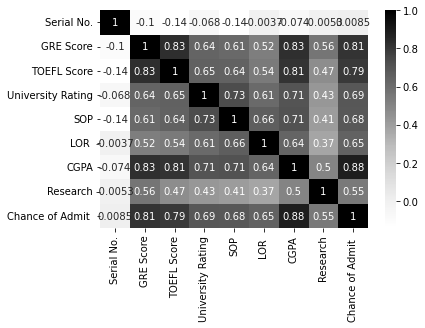

In [15]:
plot = sns.heatmap(uni.corr(), cmap="Greys", annot=True)
plt.show()

In [35]:
x=uni[["GRE Score","TOEFL Score","SOP","Research","CGPA"]]
y=uni['University Rating']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression(normalize=True).fit(x_train,y_train)
pred=lr.predict(x_test)
mean_absolute_error=metrics.mean_absolute_error(y_test,pred)
print(mean_absolute_error)

0.591155540818858


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(x_train, y_train) 
y_pred_test = logreg.predict(x_test)
b=metrics.mean_absolute_error(y_test,y_pred_test)
print(b)

0.63


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
pred_new = tree.predict(x_test)   
print(pred_new)
acc_new = tree.score(x_test, y_test)
a = metrics.mean_absolute_error(y_test, pred_new)
print(a)

0.7
